In [1]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
import random

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '10' 

### 함수 호출하여 파일명 출력 (전체)

In [59]:
# 각 파일 처리
def load_files(path):
    freqs = []
    results = []
    file_list = glob.glob(path)  # url모두 포함
    for fname in file_list:   # 파일개수 : 20번 실행        # fname : '.lang/train\\en-1,.txt' / name : en-1,.txt
        name = os.path.basename(fname)  # 파일명 : 파일1번, 파일2번
        lang = name.split("-")[0]    
        
        with open (fname,'r',encoding='utf-8') as f:  
            text = f.read()             # 파일내용
            
        text = text.lower()
        
        cnt = [0 for n in range(0,26)]
        code_a = ord('a')
        code_z = ord('z')
        
        # 메모장 안의 모든 문자를 가져와서, a~z 사이의 문자만 저장
        for ch in text:
            n = ord(ch)
            if code_a <= n <= code_z:
                cnt[n-code_a] += 1     # b 98-97 = 1의 자리에 1 증가
                
        # 정규화 작업 각 피쳐마다 비율을 일정하게 맞춤(0~1 사이의 값으로)
        total =  sum(cnt)
        
        # 데이터의 값이 0-1 사이의 값으로 변환
        freq = list(map(lambda n : n/total, cnt))
        
        # data 값을 저장
        freqs.append(freq)
        
        # 결과값 리스트 저장       
        results.append(lang)
        
    return {"freqs":freqs, "results" : results}

In [61]:
path = './lang/train/*.txt'
path2 = './lang/test/*'

# 함수 : train_input, train_target, test_input, test_target
data = load_files(path)  # 함수호출 - 20개의 train 데이터를 가져옴
test = load_files(path2) # 8개의 test 데이터를 가져옴

data['freqs'][0]
test['freqs'][0]
data['results'][0]

'en'

### 파일 확인(1개)

In [8]:
link = './lang/train/*.txt'
link2 = './lang/test/*'

# 폴더안의 모든 데이터를 읽어옴
file_list =  glob.glob(link)
file_list

['./lang/train\\en-1.txt',
 './lang/train\\en-2.txt',
 './lang/train\\en-3.txt',
 './lang/train\\en-4.txt',
 './lang/train\\en-5.txt',
 './lang/train\\fr-10.txt',
 './lang/train\\fr-6.txt',
 './lang/train\\fr-7.txt',
 './lang/train\\fr-8.txt',
 './lang/train\\fr-9.txt',
 './lang/train\\id-11.txt',
 './lang/train\\id-12.txt',
 './lang/train\\id-13.txt',
 './lang/train\\id-14.txt',
 './lang/train\\id-15.txt',
 './lang/train\\tl-16.txt',
 './lang/train\\tl-17.txt',
 './lang/train\\tl-18.txt',
 './lang/train\\tl-19.txt',
 './lang/train\\tl-20.txt']

In [35]:
# 폴더의 모든 파일의 이름을 출력
name = os.path.basename(file_list[0])

data = []
results = []

for fname in file_list:
    name = os.path.basename(fname)
    # print(name)
    
    # 데이터 가져오기
    
    # str split을 사용해서 앞에 있는 2글자만 분리해서 출력
    # print(type(name))
    lang = name.split('-')
    # print(lang)
    results.append(lang[0])


### 데이터 전처리 - train세트, test세트 생성
머신러닝순서
1. 데이터 전처리
2. 데이터 학습시키기
3. 데이터 에측하기
4. 정답률 출력하기

In [62]:
# 데이터 학습시키기
clf = svm.SVC()
clf.fit(data['freqs'], data['results'])

# 데이터 예측하기
predict = clf.predict(test['freqs'])
print("결과 값 :", predict)

결과 값 : ['en' 'en' 'fr' 'fr' 'id' 'id' 'tl' 'tl']


In [63]:
score = clf.score(test['freqs'], test['results'])
print("정답률 :", score)

정답률 : 1.0


In [65]:
cl_report = metrics.classification_report(test['results'], predict)
print(cl_report)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [71]:
data['freqs'][0]

[0.07595212187159957,
 0.012840043525571273,
 0.04570184983677911,
 0.04613710554951034,
 0.10533188248095757,
 0.015669205658324265,
 0.019151251360174103,
 0.043743199129488576,
 0.07399347116430903,
 0.0017410228509249185,
 0.00544069640914037,
 0.05375408052230685,
 0.026332970620239392,
 0.07747551686615888,
 0.08966267682263329,
 0.016539717083786723,
 0.0,
 0.07769314472252448,
 0.061371055495103376,
 0.08052230685527748,
 0.02589771490750816,
 0.009793253536452665,
 0.014145810663764961,
 0.0006528835690968443,
 0.02002176278563656,
 0.0004352557127312296]

In [72]:
data['freqs'][0][:3]

[0.07595212187159957, 0.012840043525571273, 0.04570184983677911]

array([<Axes: title={'center': 'en'}>, <Axes: title={'center': 'fr'}>,
       <Axes: title={'center': 'id'}>, <Axes: title={'center': 'tl'}>],
      dtype=object)

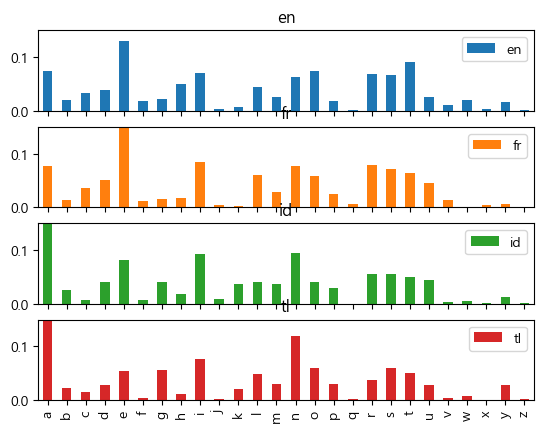

In [73]:
# 그래프 그리기
lang_dic = {}
for i, result in enumerate(data['results']):
    fq = data['freqs'][i]    # data 부분을 가지고 옴
    if not (result in lang_dic):
        lang_dic[result] = fq
    for idx, v in enumerate(fq):
        lang_dic[result][idx] =  (lang_dic[result][idx]+v) / 2
        
# x축의 눈금을 생성
asc_list = [chr(n) for n in range(97,122+1)]  #26개 x축
df = pd.DataFrame(lang_dic,index=asc_list)
df.plot(kind='bar', subplots=True, ylim=(0,0.15))  

In [77]:
df.columns

Index(['en', 'fr', 'id', 'tl'], dtype='object')

(0.0, 0.15)

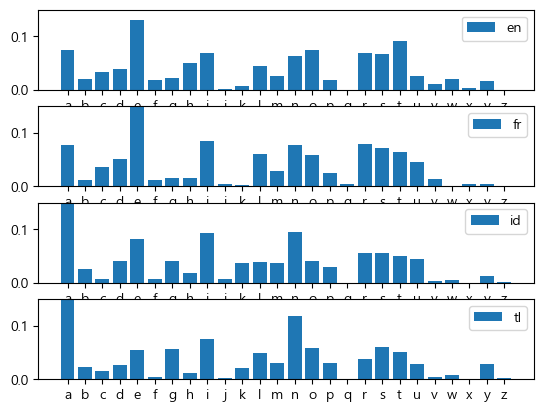

In [81]:
fig, axs = plt.subplots(4)
axs[0].bar(df.index, df['en'], label=df.columns[0])
axs[1].bar(df.index, df['fr'], label=df.columns[1])
axs[2].bar(df.index, df['id'], label=df.columns[2])
axs[3].bar(df.index, df['tl'], label=df.columns[3])

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

axs[0].set_ylim(0,0.15)
axs[1].set_ylim(0,0.15)
axs[2].set_ylim(0,0.15)
axs[3].set_ylim(0,0.15)

In [49]:
# 1개 파일이름
name = os.path.basename(file_list[0])
# name
lang = name.split('-')
print(lang[0])

# 1개 파일 내용 읽어오기
cnt = [0 for n in range(0,26)]
with open('./lang/train/'+name, 'r', encoding='utf-8') as f:
    # print(f.read())
    text = f.read()
    # 소문자 치환 
    text = text.lower()
    # 문자 개수 세기
    # 영문자가 26개 있음 -> 배열 26개 짜리를 1개 생성

    # 1개씩 문자를 읽어와서 26개의 배열에서 1씩 추가
    code_a = ord('a')
    code_z = ord('z')
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z:   # a~z 사이의 문자이면
            # 리스트에 저장
            cnt[n-code_a] += 1     # 해당되는 위치에 1을 증가 
    # 정규화
    total = sum(cnt)
    
    # freq의 배열의 값을 total로 나눠서 다시 리스트를 만듬
    # freq = []
    # for i in cnt:
    #     freq.append({i/total})
    
    def change(n):
        return n/total
    # freq = list(map(change(n),cnt))  
         
    freq = list(map(lambda n : n/total,cnt))      
          
# print(cnt)
print(freq)

en
[0.07595212187159957, 0.012840043525571273, 0.04570184983677911, 0.04613710554951034, 0.10533188248095757, 0.015669205658324265, 0.019151251360174103, 0.043743199129488576, 0.07399347116430903, 0.0017410228509249185, 0.00544069640914037, 0.05375408052230685, 0.026332970620239392, 0.07747551686615888, 0.08966267682263329, 0.016539717083786723, 0.0, 0.07769314472252448, 0.061371055495103376, 0.08052230685527748, 0.02589771490750816, 0.009793253536452665, 0.014145810663764961, 0.0006528835690968443, 0.02002176278563656, 0.0004352557127312296]


### 아스키코드

In [42]:
# 아스키코드 : 문자를 숫자로 표시, /   A : 65  /  a : 97  /  0 : 48
chr(65)
chr(97-32)
chr(65+32)
chr(50-48)  # 숫자가 2가 아닌 문자 2가 출력됨
chr(91) # 대괄호

# 아스키코드 찾기
ord('a')
ord('s')

'['

#### 배열 만드는 3가지 방법

In [29]:
[0 for n in range(0,26)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
np.zeros(26)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
np.ones(26)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])